This notebooks plots some descriptive statistics of the raw text data.


## Inputs

- `data/pubmed/abstracts.csv.gz`: raw text data

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('talk')  # noqa
from python.cogtext.datasets.pubmed import PubMedDataLoader

In [2]:
data = PubMedDataLoader(preprocessed=False).load()

In [3]:
n_articles = len(data.index)
n_unique_articles = data['pmid'].nunique()
print(f'Dataset contains {n_articles} articles, of that {n_unique_articles} are unique.')

Dataset contains 522972 articles, of that 385705 are unique.


<AxesSubplot:title={'center':'Number of articles per label'}, ylabel='label'>

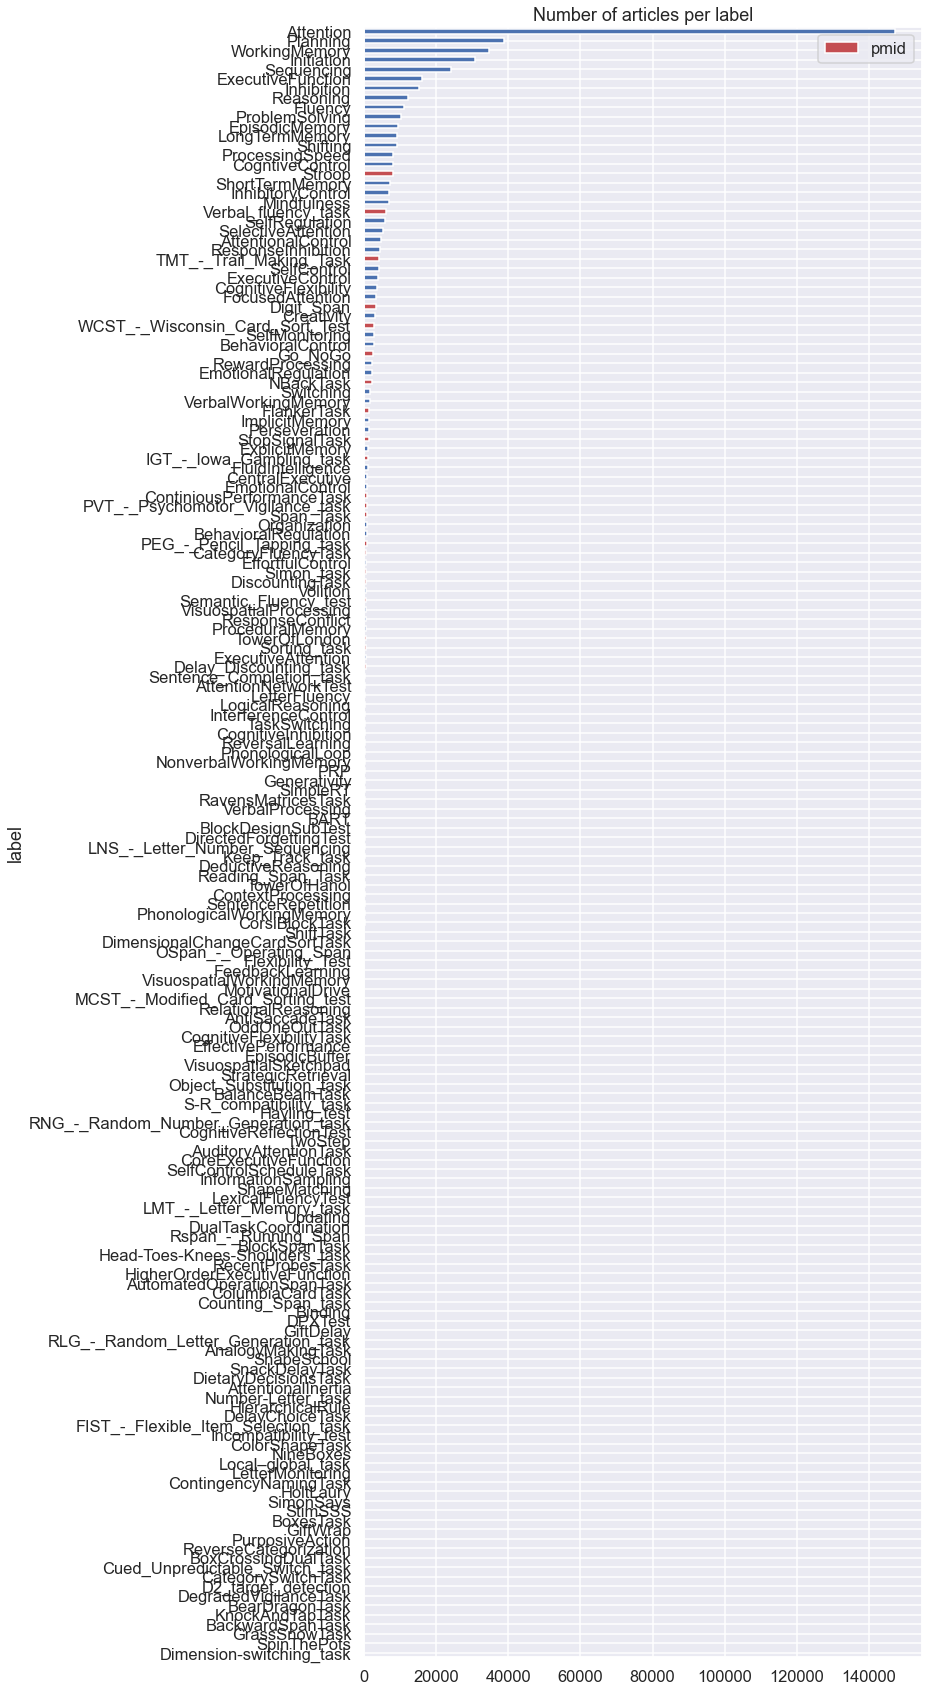

In [4]:
# plot number of articles for each lexicon term (or labels).

counts = data.groupby(['category','label'])[['pmid']].nunique().reset_index().sort_values('pmid', ascending=True)

counts['color'] = counts['category'].apply(lambda c: 'r' if 'Task' in c else 'b')

# counts.sort_values(by='pmid', ascending=False)
counts.plot(kind='barh', x='label', y='pmid', color=counts['color'], figsize=(10, 30), title='Number of articles per label')
# .plot(kind='bar', x='index', figsize=(30, 5), title='Number of articles per label')

In [41]:
counts.query('label == "NBackTask"')
# counts.query('label == "Stroop"')


# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(counts)

data.query('label == "NBackTask"')['year'].apply([min, max])


min    1988
max    2022
Name: year, dtype: int64

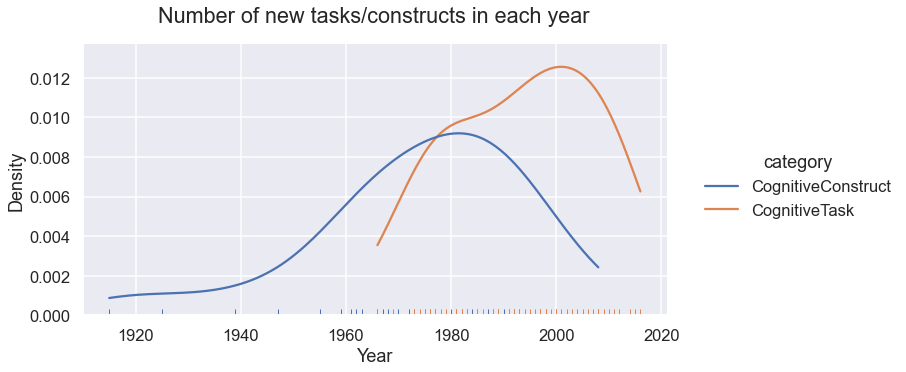

In [86]:
# plot first appearance of task/construct as a function of time

appearances = data.groupby(['category','label'])['year'].min().reset_index()

import seaborn as sns

appearances = appearances.groupby(['year','category']).nunique().reset_index()

# 2021 corpus is incomplete, so we drop it
appearances = appearances.query('year <= 2020')

# sns.kdeplot(x='year', data=appearances, hue='category', ax=ax, cut=0)
sns.displot(
  x='year',
  data=appearances,
  hue='category',
  kind='kde', cut=0, rug=True,
  height=5, aspect=2)

plt.suptitle('Number of new tasks/constructs in each year', y=1.05, x=.42)
plt.xlabel('Year')
# ax.legend_.set_title(None)
plt.show()

In [ ]:
# report first and last years of the "first appearances'

appearances.groupby(['category']).agg({'year': ['min','max']})

year      
                     min   max
category                      
CognitiveConstruct  1915  2008
CognitiveTask       1966  2016